## Image processing in Python
### Count objects

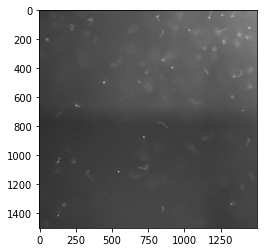

In [1]:
from matplotlib.pyplot import imshow
%matplotlib inline
# Importing Image class from PIL module
from PIL import Image
 
# Opens a image in RGB mode
im = Image.open('5.tif')
 
# Setting the points for cropped image
left = 500
top = 500
right = 2000
bottom = 2000
 
# Cropped image of above dimension
# (It will not change original image)
im1 = im.crop((left, top, right, bottom))
 
# Shows the image in image viewer
im1.save('cropped.tif')
imshow(im1, cmap='gray')

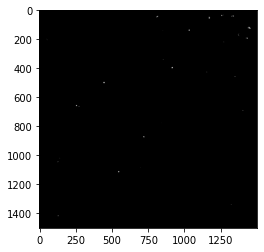

In [3]:
import cv2
im_gray = cv2.imread('cropped.tif', cv2.IMREAD_GRAYSCALE)
thresh = 180
im_bw = cv2.threshold(im_gray, thresh, 255, cv2.THRESH_BINARY)[1]
cv2.imwrite('bw_image.png', im_bw)
imshow(im_bw, cmap='gray')

In [4]:
import pandas as pd
df = pd.DataFrame(im_bw)
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#plt.imshow(df.values, cmap='gray')

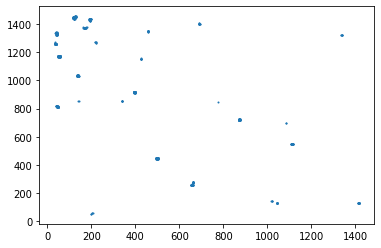

In [5]:
import matplotlib.pyplot as plt
points = []
for index, row in df.iterrows():
    for i,x in enumerate(row):
        if x==255:
            points.append([index,i])
df_plt = pd.DataFrame(points)
plt.scatter(df_plt[0],df_plt[1], s=1)
plt.show()

In [6]:
df_plt.head()

,0,1
0,33,1268
1,34,1256
2,34,1257
3,34,1258
4,34,1268


In [ ]:
from skimage import io, filters, measure, data
from scipy import ndimage
import matplotlib.pyplot as plt

im = io.imread('cropped.tif', as_gray = True)

imshow(im, cmap='gray')

#val = filters.threshold_otsu(im)
#drops = ndimage.binary_fill_holes(im < 0.4)
#plt.imshow(drops, cmap='gray')
#plt.show()

#labels = measure.label(drops)


print(labels.max())
print('coverage is %f' %(drops.mean()))

In [ ]:
from skimage import data, io, filters, measure

image = data.coins()
# image = io.imread('bbder03.jpg', as_gray = True)
# ... or any other NumPy array!
edges = filters.sobel(image)
io.imshow(edges)
io.show()